<a href="https://colab.research.google.com/github/pesfahanian/pearson_correlation/blob/main/pearson_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import random
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras

from tensorflow.keras.applications.densenet import DenseNet121

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.applications.densenet import preprocess_input

In [15]:
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
epochs = 15

In [3]:
size = 10
indices = random.sample(range(0, 59999), 10)
print(indices)

[53780, 33666, 34091, 18688, 37985, 46093, 15813, 7925, 30879, 58840]


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_sample = []
y_sample = []
for i in indices:
    x_sample.append(x_train[i])
    y_sample.append(y_train[i])
x_sample = np.array(x_sample)
y_sample = np.array(y_sample)

In [22]:
x_sample = x_sample.astype("float32") / 255
x_sample = np.expand_dims(x_sample, -1)

In [23]:
print(x_sample.shape)
print(y_sample.shape)

(10, 28, 28, 1)
(10,)


In [6]:
print(y_sample)

[1 2 1 9 2 1 1 0 7 4]


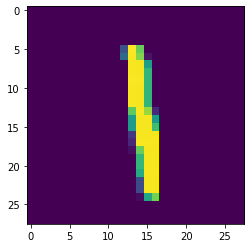

In [9]:
plt.imshow(x_sample[0])
plt.show()

In [10]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3638 - accuracy: 0.8865 - val_loss: 0.0809 - val_accuracy: 0.9758
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1123 - accuracy: 0.9655 - val_loss: 0.0544 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0825 - accuracy: 0.9738 - val_loss: 0.0466 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0690 - accuracy: 0.9784 - val_loss: 0.0429 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0623 - accuracy: 0.9807 - val_loss: 0.0412 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0519 - accuracy: 0.9834 - val_loss: 0.0355 - val_accuracy: 0.9912
Epoch 

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02440529130399227
Test accuracy: 0.9915000200271606


In [19]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('flatten').output)

In [20]:
feature_extractor.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
__________________________________________________

In [24]:
features = feature_extractor.predict(x_sample)

In [26]:
features.shape

(10, 1600)

In [60]:
label_a = []
label_b = []
correlation = []
p_value = []

In [61]:
# counter = 0
for i in range(size):
    for j in range(i, size):
        # counter += 1
        label_a.append(y_sample[i])
        label_b.append(y_sample[j])
        rho = stats.pearsonr(features[i], features[j])
        correlation.append(rho[0])
        p_value.append(rho[1])
# print(counter)

In [57]:
data = {
    'label_a':      label_a,
    'label_b':      label_b,
    'correlation':  correlation,
    'p_value':      p_value
}

In [62]:
df = pd.DataFrame.from_dict(data)

In [63]:
df

,label_a,label_b,correlation,p_value
0,1,1,1.000000,0.000000e+00
1,1,2,0.032373,1.955789e-01
2,1,1,-0.009075,7.168116e-01
3,1,9,0.049564,4.745343e-02
4,1,2,-0.002620,9.166028e-01
5,1,1,0.007761,7.563991e-01
6,1,1,-0.041182,9.961827e-02
7,1,0,-0.066764,7.551972e-03
8,1,7,0.175117,1.741163e-12
9,1,4,0.086964,4.968844e-04
